### Creating time series using any `ML` model

- Here we need to convert the data into a `Supervised Learning`.

In [19]:
# importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from math import sqrt

import warnings
warnings.filterwarnings("ignore")

In [2]:
# importing the dataset

df = pd.read_csv("data/alcohol_sales.csv", index_col="DATE", parse_dates=True)
df.head()

,S4248SM144NCEN
DATE,
1992-01-01,3459
1992-02-01,3458
1992-03-01,4002
1992-04-01,4564
1992-05-01,4221


In [3]:
# Changing column name to 'Sales'

df.columns = ['Sales']
df.head()

,Sales
DATE,
1992-01-01,3459
1992-02-01,3458
1992-03-01,4002
1992-04-01,4564
1992-05-01,4221


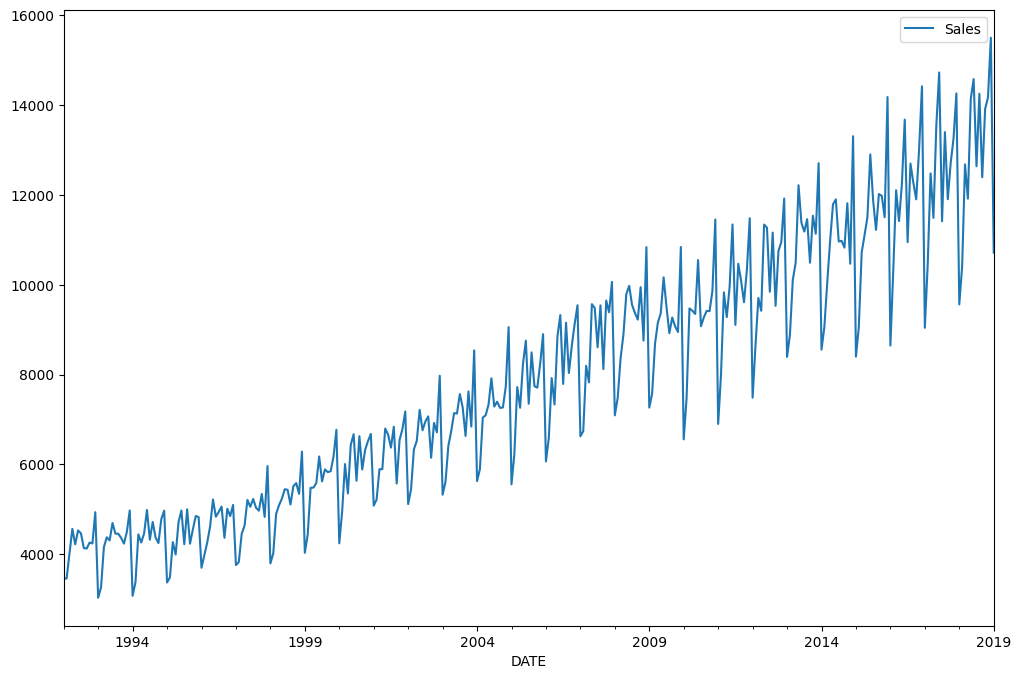

In [5]:
# Plotting the data

df.plot(figsize=(12,8))
plt.show()

- Here we only have the input data.
- To make it as time series data we also need output data.
- So now we need to create an output column.
- Suppose we use last one months value as input to make future prediction.
- So here we are taking data from the `Sales` column and using `shift()` we are creating new columns
  - Shift: index by desired number of periods with an optional time `freq`.

In [6]:
df['Sale_LastMonth'] = df['Sales'].shift(+1)    # for sales of last month
df['Sale_2Monthsback'] = df['Sales'].shift(+2)  # for sales of last 2 months
df['Sale_3Monthsback'] = df['Sales'].shift(+3)  # for sales of last 3 months
df

,Sales,Sale_LastMonth,Sale_2Monthsback,Sale_3Monthsback
DATE,,,,
1992-01-01,3459,NaN,NaN,NaN
1992-02-01,3458,3459.0,NaN,NaN
1992-03-01,4002,3458.0,3459.0,NaN
1992-04-01,4564,4002.0,3458.0,3459.0
1992-05-01,4221,4564.0,4002.0,3458.0
...,...,...,...,...
2018-09-01,12396,14257.0,12640.0,14583.0
2018-10-01,13914,12396.0,14257.0,12640.0
2018-11-01,14174,13914.0,12396.0,14257.0


In [7]:
# dropping the null values

df=df.dropna()
df

,Sales,Sale_LastMonth,Sale_2Monthsback,Sale_3Monthsback
DATE,,,,
1992-04-01,4564,4002.0,3458.0,3459.0
1992-05-01,4221,4564.0,4002.0,3458.0
1992-06-01,4529,4221.0,4564.0,4002.0
1992-07-01,4466,4529.0,4221.0,4564.0
1992-08-01,4137,4466.0,4529.0,4221.0
...,...,...,...,...
2018-09-01,12396,14257.0,12640.0,14583.0
2018-10-01,13914,12396.0,14257.0,12640.0
2018-11-01,14174,13914.0,12396.0,14257.0


**Creating `ML` models**

In [10]:
# Creating Linear regression model

lin_model = LinearRegression()

In [11]:
# Creating Random forest model

model = RandomForestRegressor(n_estimators=100, max_features=3, random_state=1)

#### Doing Data Preprocessing

- Here we are extracting sales of last month, sales of 2 months back and 3 months back and storing them in variables `x1`, `x2`, `x3` (inputs) and `y` (output) will have the Sales data i.e. sales for current month.
- Now converting them into numpy arrays.
- Then we need to reshape them all in `(-1,1)`. `-1` means no need to worry about the number of rows, and `1` means a single column.
- Then we will concatenate them to get the final inputs.

In [12]:
x1,x2,x3,y = df['Sale_LastMonth'], df['Sale_2Monthsback'], df['Sale_3Monthsback'], df['Sales']
x1,x2,x3,y = np.array(x1), np.array(x2), np.array(x3), np.array(y)
x1,x2,x3,y = x1.reshape(-1,1), x2.reshape(-1,1), x3.reshape(-1,1), y.reshape(-1,1)
final_x = np.concatenate((x1,x2,x3), axis=1)
print(final_x)

[[ 4002.  3458.  3459.]
 [ 4564.  4002.  3458.]
 [ 4221.  4564.  4002.]
 [ 4529.  4221.  4564.]
 [ 4466.  4529.  4221.]
 [ 4137.  4466.  4529.]
 [ 4126.  4137.  4466.]
 [ 4259.  4126.  4137.]
 [ 4240.  4259.  4126.]
 [ 4936.  4240.  4259.]
 [ 3031.  4936.  4240.]
 [ 3261.  3031.  4936.]
 [ 4160.  3261.  3031.]
 [ 4377.  4160.  3261.]
 [ 4307.  4377.  4160.]
 [ 4696.  4307.  4377.]
 [ 4458.  4696.  4307.]
 [ 4457.  4458.  4696.]
 [ 4364.  4457.  4458.]
 [ 4236.  4364.  4457.]
 [ 4500.  4236.  4364.]
 [ 4974.  4500.  4236.]
 [ 3075.  4974.  4500.]
 [ 3377.  3075.  4974.]
 [ 4443.  3377.  3075.]
 [ 4261.  4443.  3377.]
 [ 4460.  4261.  4443.]
 [ 4985.  4460.  4261.]
 [ 4324.  4985.  4460.]
 [ 4719.  4324.  4985.]
 [ 4374.  4719.  4324.]
 [ 4248.  4374.  4719.]
 [ 4784.  4248.  4374.]
 [ 4971.  4784.  4248.]
 [ 3370.  4971.  4784.]
 [ 3484.  3370.  4971.]
 [ 4269.  3484.  3370.]
 [ 3994.  4269.  3484.]
 [ 4715.  3994.  4269.]
 [ 4974.  4715.  3994.]
 [ 4223.  4974.  4715.]
 [ 5000.  4223. 

**Now splitting the dataset into `train` and `test`**

In [13]:
# Here we are keeping the last 30 days value for the test data

X_train,X_test,y_train,y_test = final_x[:-30], final_x[-30:], y[:-30], y[-30:]

X_train.shape, X_test.shape

((292, 3), (30, 3))

**Now training the models**

In [16]:
model.fit(X_train,y_train)
lin_model.fit(X_train,y_train)

LinearRegression()

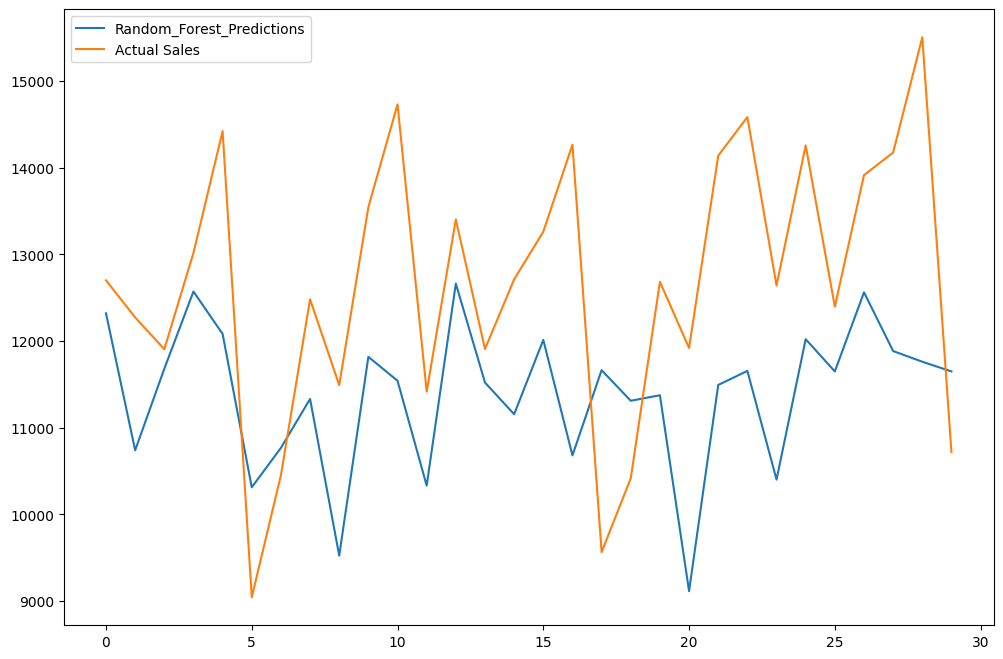

In [17]:
# Doing predictions for random forest model

pred = model.predict(X_test)
plt.rcParams["figure.figsize"] = (12,8)
plt.plot(pred,label='Random_Forest_Predictions')
plt.plot(y_test,label='Actual Sales')
plt.legend(loc="upper left")
plt.show()

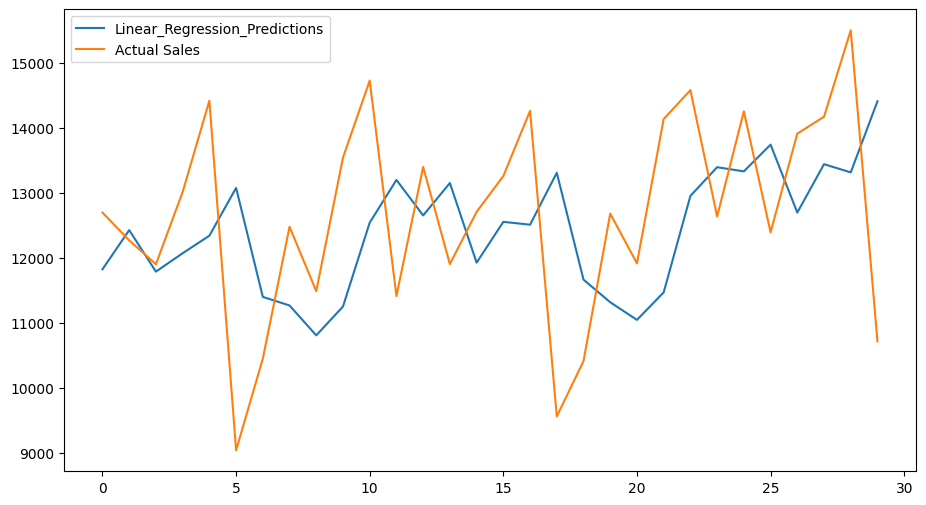

In [18]:
# Doing predictions for linear regression model

lin_pred = lin_model.predict(X_test)
plt.rcParams["figure.figsize"] = (11,6)
plt.plot(lin_pred,label='Linear_Regression_Predictions')
plt.plot(y_test,label='Actual Sales')
plt.legend(loc="upper left")
plt.show()

- Here we can see the `Linear Regression` model do the prediction better.

In [20]:
# Doing rmse to find the error of each model

rmse_rf = sqrt(mean_squared_error(pred, y_test))
rmse_lr = sqrt(mean_squared_error(lin_pred, y_test))

print('Mean Squared Error for Random Forest Model is:', rmse_rf)
print('Mean Squared Error for Linear Regression Model is:', rmse_lr)

Mean Squared Error for Random Forest Model is: 1913.7762399350665
Mean Squared Error for Linear Regression Model is: 1791.4965232759828


- So we can see `Linear Regression` has lower error, so it is performing better.